# 1| 理解业务需求和数据

## 1|1 业务概述

### 1|1|1 研究问题


#### 1、描述型问题

- 受访者的年龄分布
- 受访者的性别分布
- 受访者的个人年度总收入分布
- 受访者的教育程度分布
- 受访者的婚姻满意度分布



#### 2、解释型问题

- 个人年度总收入和生活满意度的关系
- 性别对婚姻满意度的影响是怎样的？
- 教育程度与收入水平的关系如何，是否存在显著的相关性？
- 年龄与婚姻满意度之间是否存在关系？如果存在，是否随着年龄增长而变化？
- 婚姻整体满意度对个人生活满意度的影响程度是多少？





### 1|1|2 项目简介
本数据集来自于北京大学中国社会科学调查中心 2018 年所做的“中国家庭追踪调查”，主要调查对象为已婚受访者的情况，共包含约1000个字段。通过对数据进行字段和样本的处理，得到了关于受访者年龄、性别、收入、教育程度、婚姻满意度等方面的数据。需要注意的是，在问卷中设置了大量的跳题，导致在各个记录中都有大量的字段为空值或为逻辑缺失值。

在数据分析项目将探索性地分析受访者在年龄、性别、收入、教育程度和婚姻满意度等方面的分布情况，以及这些变量之间的关系。具体分析问题：不同性别和婚姻满意度的关系、教育程度与收入水平的关系、年龄与婚姻满意度之间是否存在关系等。

本项目将运用可视化方法对数据进行探索，并基于数据分析结果对问题进行解读。通过对这些问题的深入分析，可以为社会科学研究提供一定的参考价值。
同时通过本次数据分析，期望能够对中国家庭现状有更深刻的认识，为相关政策的制定提供参考依据。


## 1|2 数据结构与含义

## 1|2|1 数据含义
| 字段名称 | 字段含义 |
| --- | --- |
| PID | 样本 ID |
| cyear | 调查年份 |
| IBIRTHY | 出生年份 |
| AGE | 年龄 |
| Sex | 性别：1为男，0为女 |
| Education | 教育程度：0为文盲/半文盲，3为小学，4为初中，5为高中、中专、技校或职高，6为大专，7为大学本科，8为硕士，9为博士 |
| SpouseAge | 配偶年龄 |
| SpouseEducation | 配偶教育程度 |
| MeetWay | 认识方式：1.在学校自己认识，2.在工作场所自己认识，3.在居住地自己认识，4.在其他地方自己认识，5.经亲戚介绍认识，6.经朋友介绍认识，7.经婚介介绍认识，8.父母包办，9.经过互联网认识的，77.其他 |
| MarryLast | 婚姻持续时间 |
| Cohabitation | 是否婚前同居：1为是，5为否 |
| FirstMarry | 是否为初婚：1为是，5为否 |
| Marriage | 是否结婚|
| Jiazhuang | 嫁妆的价值 |
| Marriage_stf | 对当前的“婚姻/同居”生活的满意度 |
| Economy_contrb_stf | 对配偶经济贡献的满意度 |
| Housework_contrb_stf | 对配偶家务贡献的满意度 |
| Job_code | 行业编码：1农、林、牧、渔业，2采矿业，3制造业，4电力、燃气及水的生产和供应业，5建筑业，6交通运输、仓储和邮政业，7信息传输、计算机服务和软件业，8批发和零售业，9住宿和餐饮业，10金融业，11房地产业，12租赁和商务服务业，13科学研究、技术服务和地质勘查业，14水利、环境和公共设施管理业，15居民服务和其他服务业，16教育，17卫生、社会保障和社会福利业，18文化、体育和娱乐业，19公共管理与社会组织，20国际组织，21其他行业，99其他 |
| Income_month | 个人月收入 |
| Income | 个人年度总收入 |
| Life_stf | 生活满意度 |
| General_stf | 婚姻整体满意度 |


    初步解读
- 个人和家庭背景信息（如出生年份、教育程度、性别等）
- 婚姻相关信息（如认识方式、是否结婚、婚姻持续时间、是否婚前同居等）
- 职业信息（如行业编码、个人月收入、个人年度总收入等）
- 心理信息（对生活和婚姻的满意度评价等）
- 可以用来进行婚姻家庭、社会心理等方面的分析。

## 1|2|2 数据结构

In [491]:
#导入必要的包
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import missingno as msno
import copy
import os
import math
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
import plotly.graph_objs as go
from plotly.subplots import make_subplots
#允许显示中文
mpl.rcParams['font.sans-serif'] = ['SimHei']
#允许显示负号
mpl.rcParams['axes.unicode_minus'] = False
#忽略警告
warnings.filterwarnings('ignore')



    读取数据

In [492]:
data = pd.read_csv('期中练习数据.csv', encoding='gbk')
data.head()

,PID,cyear,IBIRTHY,AGE,Sex,Education,SpouseAge,SpouseEducation,MeetWay,MarryLast,...,Marriage,Jiazhuang,Marriage_stf,Economy_contrb_stf,Housework_contrb_stf,Job_code,Income_month,Income,Life_stf,General_stf
0,100051501,2018,1969,49,0,5,-8,-8,-8,-8,...,2,-8,5,4,4,8,3000,36000,4,4.33
1,100051502,2018,1966,52,1,5,-8,-8,-8,-8,...,2,-8,5,5,5,8,72000,100000,4,5.00
2,100160601,2018,1989,29,1,7,27,7,6,1,...,2,-8,5,5,3,6,9100,100000,4,4.33
3,100376551,2018,1997,21,0,4,22,-1,6,0,...,2,50000,5,4,3,8,3000,30000,4,4.00
4,100551551,2018,1990,28,0,7,30,7,5,4,...,2,-8,5,5,4,7,2000,30000,4,4.67


    空缺值还原

In [493]:
# 将所有为负数的数值替换为空
data=data[data>=0]

### 1、数据集的基本信息

    数据集大小

In [494]:
data.shape

(23638, 22)

### 2、变量的名称、数据类型，以及缺失值情况等相关统计信息

    变量名称

In [495]:
data.columns

Index(['PID', 'cyear', 'IBIRTHY', 'AGE', 'Sex', 'Education', 'SpouseAge',
       'SpouseEducation', 'MeetWay', 'MarryLast', 'Cohabitation', 'FirstMarry',
       'Marriage', 'Jiazhuang', 'Marriage_stf', 'Economy_contrb_stf',
       'Housework_contrb_stf', 'Job_code', 'Income_month', 'Income',
       'Life_stf', 'General_stf'],
      dtype='object')

    数据类型
| 变量 | 类型 |
| --- | --- |
| Sex | 定类变量 |
| AGE | 定量变量 |
| IBIRTHY | 定量变量 |
| Education | 定类变量 |
| Cohabitation | 定类变量 |
| FirstMarry | 定类变量 |
| MeetWay | 定类变量 |
| MarryLast | 定量变量 |
| SpouseAge | 定量变量 |
| SpouseEducation | 定量变量 |
| Jiazhuang | 定量变量 |
| Marriage_stf | 定量变量 |
| Economy_contrb_stf | 定量变量 |
| Housework_contrb_stf | 定量变量 |
| Job_code | 定类变量 |
| Income_month | 定量变量 |
| Income | 定量变量 |
| Life_stf | 定量变量 |
| General_stf | 定量变量 |


    描述性统计

In [496]:
data.describe()

,PID,cyear,IBIRTHY,AGE,Sex,Education,SpouseAge,SpouseEducation,MeetWay,MarryLast,...,Marriage,Jiazhuang,Marriage_stf,Economy_contrb_stf,Housework_contrb_stf,Job_code,Income_month,Income,Life_stf,General_stf
count,2.363800e+04,23638.000000,23638.000000,23638.000000,23638.000000,23637.000000,4165.000000,4108.000000,4139.000000,4134.000000,...,23638.000000,476.000000,23624.000000,23607.000000,23616.000000,10213.000000,23598.000000,23638.000000,23632.000000,23630.000000
mean,3.866858e+08,2018.029444,1968.893773,49.115323,0.491497,3.258874,114.181273,3.728092,5.537811,158.808418,...,1.998139,39983.172269,4.517059,4.329775,4.207486,8.804367,1161.522629,15337.831923,4.054291,4.348156
std,1.577412e+08,0.169051,14.321176,14.313971,0.499938,2.035280,368.551953,2.051758,8.867327,512.201251,...,0.043105,71288.975150,0.835369,0.997958,1.130587,9.880777,2670.612927,31007.211376,0.949696,0.824772
min,1.000515e+08,2018.000000,1922.000000,16.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2.305286e+08,2018.000000,1957.000000,37.000000,0.000000,3.000000,30.000000,3.000000,3.000000,3.000000,...,2.000000,0.000000,4.000000,4.000000,4.000000,3.000000,0.000000,0.000000,3.000000,4.000000
50%,4.106551e+08,2018.000000,1969.000000,49.000000,0.000000,4.000000,42.000000,4.000000,5.000000,16.000000,...,2.000000,15000.000000,5.000000,5.000000,5.000000,8.000000,0.000000,0.000000,4.000000,4.670000
75%,5.103559e+08,2018.000000,1981.000000,61.000000,1.000000,4.000000,56.000000,5.000000,6.000000,34.000000,...,2.000000,50000.000000,5.000000,5.000000,5.000000,11.000000,2000.000000,24000.000000,5.000000,5.000000
max,2.489152e+09,2019.000000,2002.000000,96.000000,1.000000,9.000000,2020.000000,9.000000,77.000000,2021.000000,...,2.000000,800000.000000,5.000000,5.000000,5.000000,99.000000,100000.000000,840000.000000,5.000000,5.000000


    频次统计

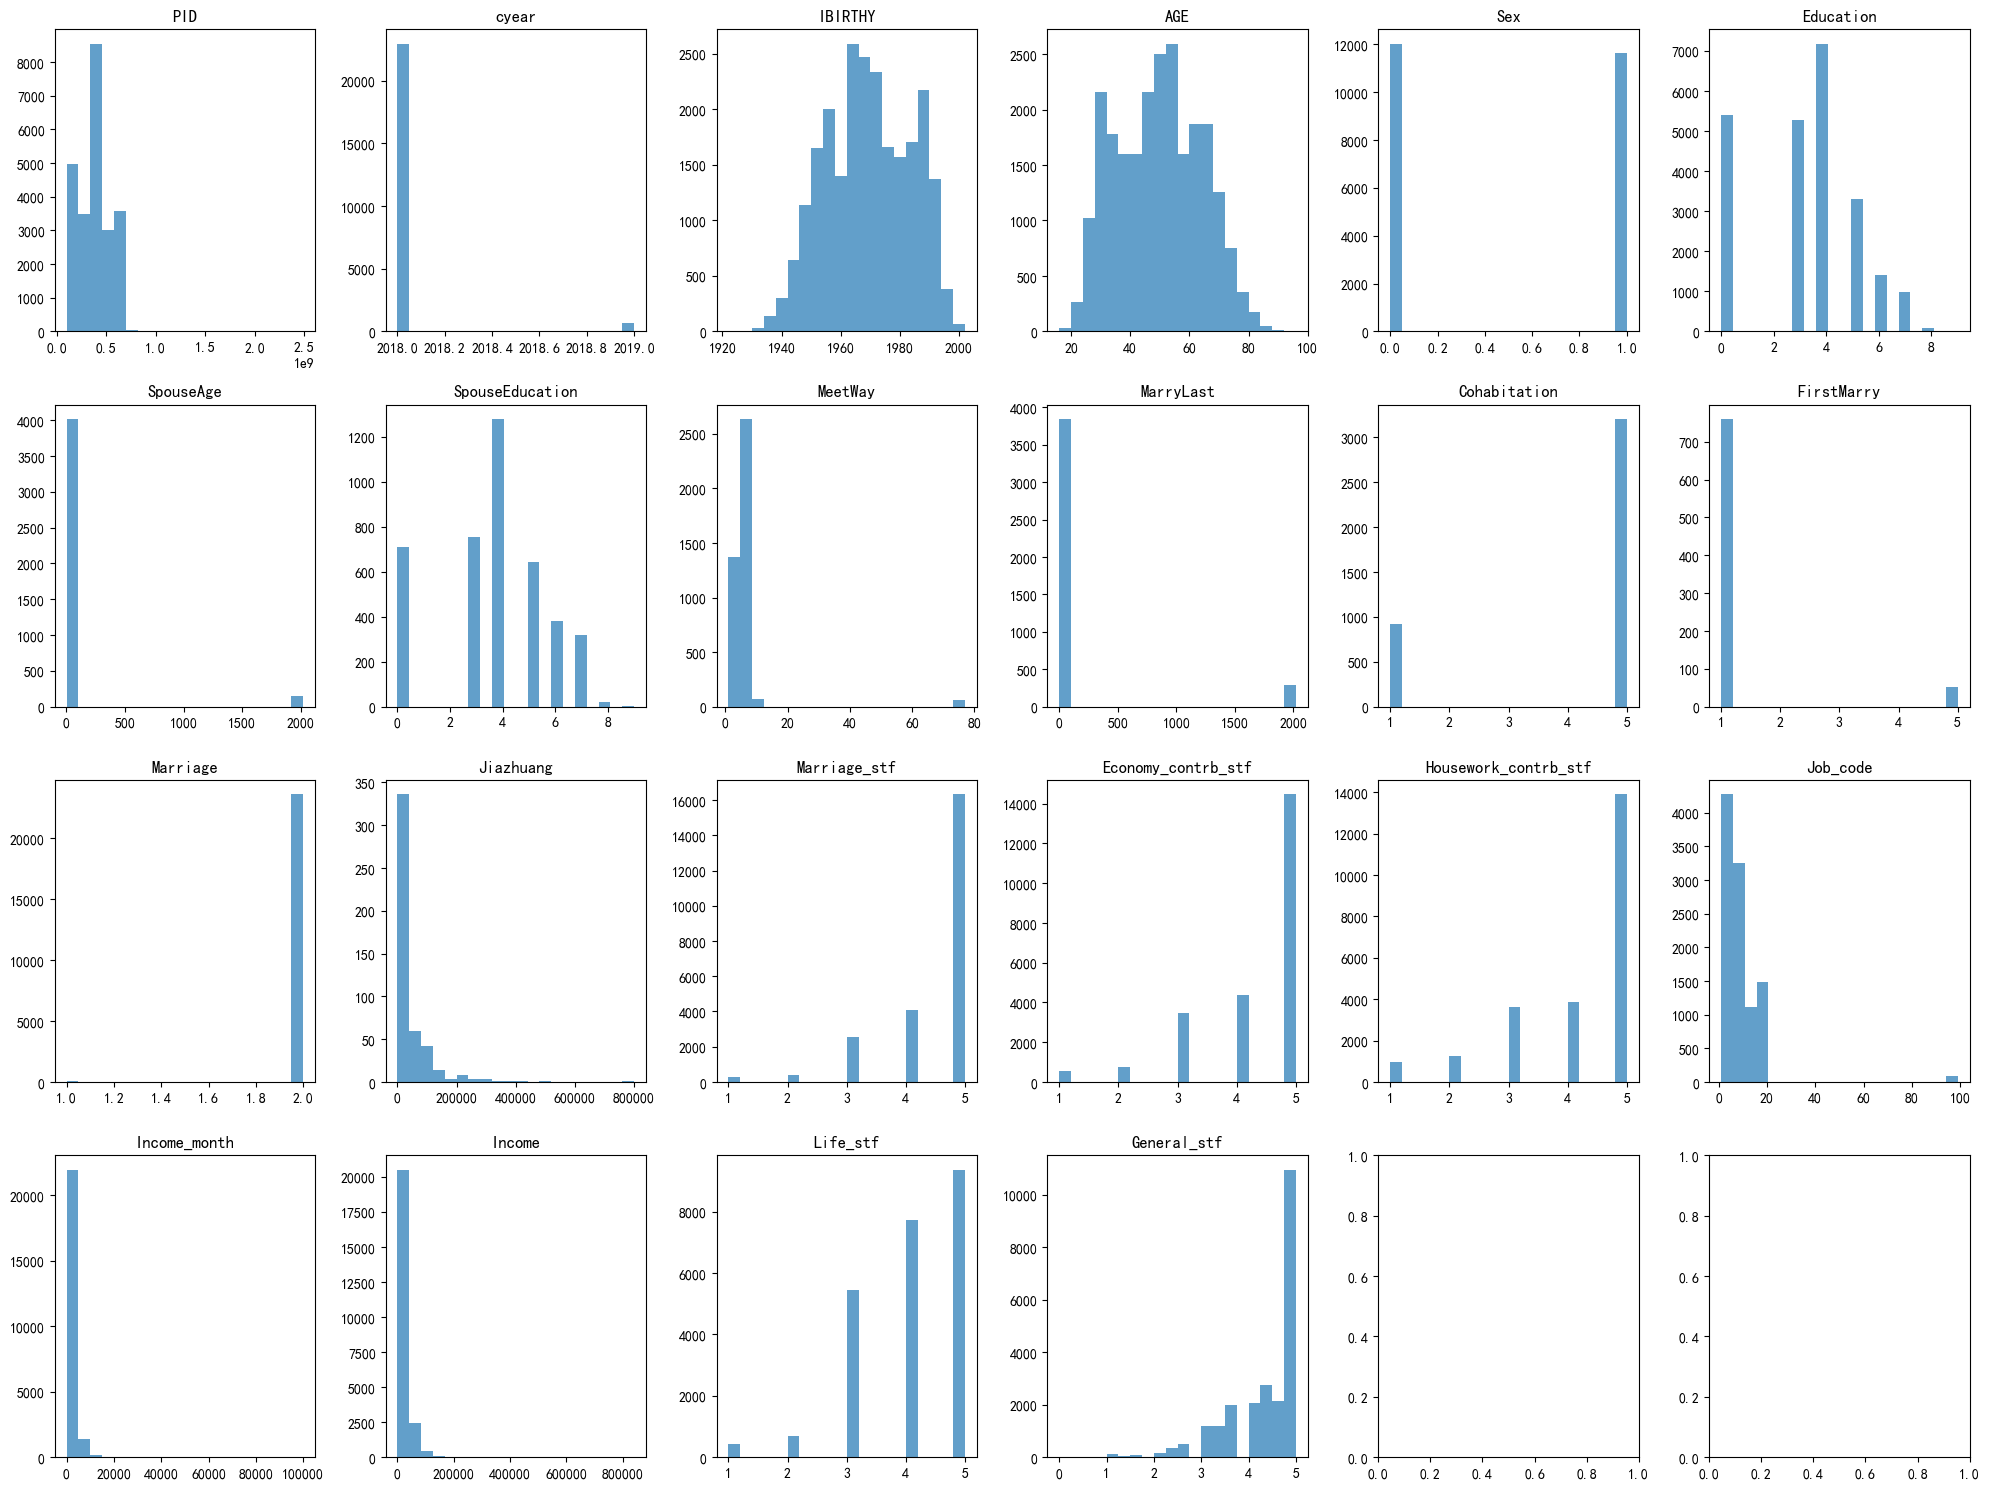

In [497]:
# 创建子图
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(20, 15))

# 遍历数据所有字段，绘制直方图
for i, col_name in enumerate(data.columns):
    row = i // 6
    col = i % 6
    ax = axes[row][col]
    ax.hist(data[col_name], bins=20, histtype='bar', alpha=0.7)
    ax.set_title(col_name)

# 配置子图布局和样式
fig.tight_layout()

# 显示图形
plt.show()


    数据信息

In [498]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23638 entries, 0 to 23637
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PID                   23638 non-null  int64  
 1   cyear                 23638 non-null  int64  
 2   IBIRTHY               23638 non-null  int64  
 3   AGE                   23638 non-null  int64  
 4   Sex                   23638 non-null  int64  
 5   Education             23637 non-null  float64
 6   SpouseAge             4165 non-null   float64
 7   SpouseEducation       4108 non-null   float64
 8   MeetWay               4139 non-null   float64
 9   MarryLast             4134 non-null   float64
 10  Cohabitation          4120 non-null   float64
 11  FirstMarry            813 non-null    float64
 12  Marriage              23638 non-null  int64  
 13  Jiazhuang             476 non-null    float64
 14  Marriage_stf          23624 non-null  float64
 15  Economy_contrb_stf 

# 2| 数据清洗与探索性分析

## 2|1 异常值处理

    婚姻状况异常值


In [499]:
#查看婚姻状况
data["Marriage"].value_counts()


2    23594
1       44
Name: Marriage, dtype: int64

In [500]:
#剔除没有结婚的受访者
data=data[data['Marriage']==2]

In [501]:

#查看婚姻状况
data["Marriage"].value_counts()

2    23594
Name: Marriage, dtype: int64


    调查年份异常值


In [502]:
data["cyear"].value_counts()

2018    22901
2019      693
Name: cyear, dtype: int64



- 由于数据来自于北京大学中国社会科学调查中心 2018 年所做的“中国家庭追踪调查”
- 从上述结果可以看出，2019年的数据比较少，所以剔除2019年的数据


In [503]:

#剔除2019年的受访者
data=data[data['cyear']!=2019]


In [504]:

data["cyear"].value_counts()


2018    22901
Name: cyear, dtype: int64

    配偶年龄异常值

In [505]:

#查看配偶年龄分布
data["SpouseAge"].value_counts()



29.0      175
28.0      171
2019.0    140
30.0      135
31.0      135
         ... 
87.0        2
84.0        2
89.0        1
90.0        1
16.0        1
Name: SpouseAge, Length: 78, dtype: int64

In [506]:

data.loc[data['SpouseAge'] > 200, 'SpouseAge'] = np.nan


    年龄异常值


In [507]:

#查看年龄分布
data["AGE"].value_counts()


50    730
55    691
48    644
53    632
56    607
     ... 
93      3
17      2
91      1
96      1
92      1
Name: AGE, Length: 78, dtype: int64



根据[《中华人民共和国婚姻法》](https://flk.npc.gov.cn/detail2.html?MmM5MDlmZGQ2NzhiZjE3OTAxNjc4YmY2MGYwODAyN2I%3D),男性的法定结婚年龄为22岁，女性的法定结婚年龄为20岁。只有达到法律规定的结婚年龄的人，才享有结婚的权利


但是根据数据集看来，有部分早婚的受访者，不满足法定的结婚年龄，决定单独研究此类人群的情况


In [508]:

# 男性的法定结婚年龄为22岁，女性的法定结婚年龄为20岁
#将不满足法定结婚年龄的受访者单独考虑
young_data=data[((data['Sex'] == 1) & (data['AGE'] < 22)) | ((data['Sex'] == 0) & (data['AGE'] < 20))]


In [509]:
#查看早婚人群数量
num=young_data.shape[0]
print(f'早婚人数有:{num}人')

早婚人数有:42人


由于早婚群体样本量过少，如果以此分析得出结论，可能会影响统计结果的精度和可靠性，考虑剔除

In [510]:
#原始数据剔除不满足法定结婚年龄的受访者
data=data[((data['AGE']>=22) & (data['Sex']==1)) | ((data['AGE']>=20) & (data['Sex']==0))]


参考资料：[《中华人民共和国婚姻法》](https://flk.npc.gov.cn/detail2.html?MmM5MDlmZGQ2NzhiZjE3OTAxNjc4YmY2MGYwODAyN2I%3D)


## 2|2 缺失值处理

### 2|2|1 缺失值识别

    缺失值可视化

缺失值有：152730条


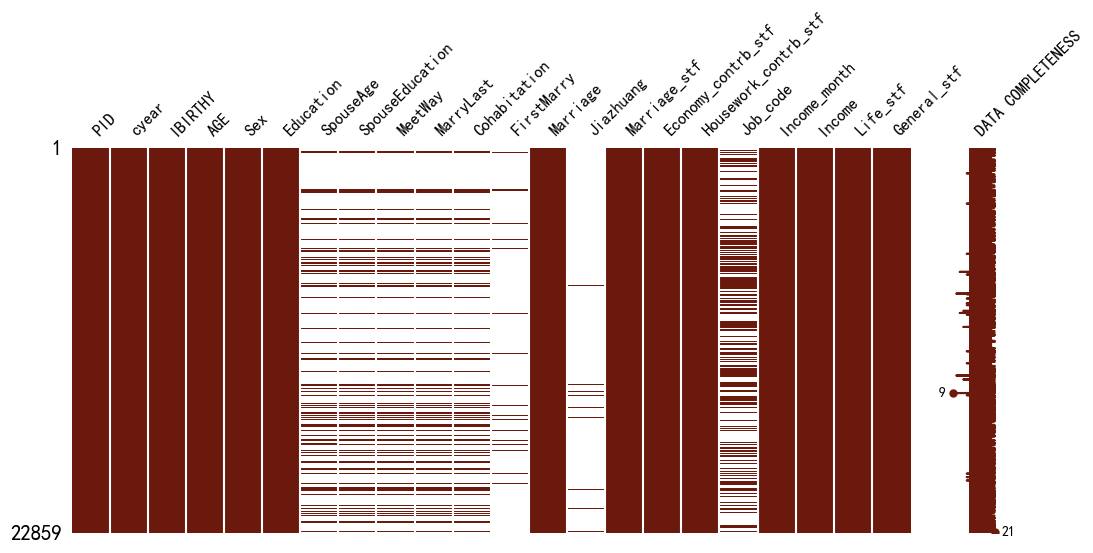

In [511]:
#检查缺失值
msno.matrix(data, figsize=(12, 5), color=(0.42, 0.1, 0.05), fontsize=12, labels=True)
print(f"缺失值有：{data.isnull().sum().sum()}条")

    缺失值统计

In [512]:
#查看缺失值的占比,百分比保留两位小数,并排序
print("各个字段缺失值的占比（%)")
print(f'{round(100*data.isnull().sum().sort_values(ascending=False)/len(data),2)}')

各个字段缺失值的占比（%)
Jiazhuang               98.11
FirstMarry              96.68
SpouseAge               83.49
SpouseEducation         83.11
Cohabitation            83.04
MarryLast               82.99
MeetWay                 82.97
Job_code                57.31
Income_month             0.16
Economy_contrb_stf       0.12
Housework_contrb_stf     0.08
Marriage_stf             0.04
Life_stf                 0.03
General_stf              0.02
Marriage                 0.00
cyear                    0.00
Education                0.00
Sex                      0.00
AGE                      0.00
Income                   0.00
IBIRTHY                  0.00
PID                      0.00
dtype: float64


可以看出，部分字段缺失值比例很高，因此研究缺失值比例低于1%的字段，舍弃缺失值过高的字段

    缺失值删除

In [513]:
thresh=0.01
# 读取数据并计算每一列的缺失值比例

missing_rate = data.isnull().sum() / len(data)

# 筛选出缺失值比例低于 1% 的字段，即 missing_rate < 0.01，保留列名
cols_to_keep = data.columns[missing_rate < thresh]

# 利用切片筛选出这些字段，生成新的 DataFrame
data_nice = data[cols_to_keep]


In [514]:
before=data_nice.describe()

    缺失值填充和效果评估

In [515]:
# 填充前的缺失值数量
before_num=data_nice.isnull().sum().sum()

In [516]:
# 遍历每个变量，计算填充前后的统计量
compare = pd.DataFrame()
for col in data_nice.columns:
    before = data_nice[col].describe()
    data_nice[col].fillna(data_nice[col].median(), inplace=True)
    after = data_nice[col].describe()
    compare_col = pd.concat([before, after], axis=1,
                            keys=[col + '_before', col + '_after'])
    compare = pd.concat([compare, compare_col], axis=1)

# 打印输出结果
print(compare)

         PID_before     PID_after  cyear_before  cyear_after  IBIRTHY_before  \
count  2.285900e+04  2.285900e+04       22859.0      22859.0    22859.000000   
mean   3.860385e+08  3.860385e+08        2018.0       2018.0     1968.582921   
std    1.579665e+08  1.579665e+08           0.0          0.0       14.245961   
min    1.000515e+08  1.000515e+08        2018.0       2018.0     1922.000000   
25%    2.305076e+08  2.305076e+08        2018.0       2018.0     1957.000000   
50%    4.105911e+08  4.105911e+08        2018.0       2018.0     1968.000000   
75%    5.103331e+08  5.103331e+08        2018.0       2018.0     1981.000000   
max    2.489152e+09  2.489152e+09        2018.0       2018.0     1998.000000   

       IBIRTHY_after    AGE_before     AGE_after    Sex_before     Sex_after  \
count   22859.000000  22859.000000  22859.000000  22859.000000  22859.000000   
mean     1968.582921     49.417079     49.417079      0.489348      0.489348   
std        14.245961     14.245961     

从统计量对比看出，中位数填充空缺值后，大部分列的统计量变化不大，整体上中位数填充空缺值的效果可以说比较不错，没有引入太多噪音

In [517]:
# 填充后的缺失值数量
after_num=data_nice.isnull().sum().sum()

# 填充前后的缺失值数量变化
print(f'填充前缺失值数量为：{before_num}')
print(f'填充后缺失值数量为：{after_num}')
print(f'缺失值数量变化为：{before_num - after_num}')


填充前缺失值数量为：101
填充后缺失值数量为：0
缺失值数量变化为：101


可以看出经过中位数填充空缺值后，所有原本为缺失值的数据点已经被成功填补。

## 2|3 特征选择

    初步选择

In [518]:

#去除比较无用的数据PID(编号)和冗余的数据IBIRTHY
data_nice.drop(['PID','IBIRTHY'],axis=1,inplace=True)


In [519]:
#去除统一取值的cyear和Marriage
data_nice.drop(['cyear','Marriage'],axis=1,inplace=True)

    相关性分析

In [520]:
data_nice.corr()

,AGE,Sex,Education,Marriage_stf,Economy_contrb_stf,Housework_contrb_stf,Income_month,Income,Life_stf,General_stf
AGE,1.000000,0.093735,-0.407925,0.041655,0.037845,0.165011,-0.288959,-0.304835,0.124399,0.101870
Sex,0.093735,1.000000,0.148572,0.169550,0.126724,0.303977,0.146494,0.177223,-0.007728,0.246183
Education,-0.407925,0.148572,1.000000,0.022553,0.026642,-0.049072,0.319290,0.358556,-0.092582,-0.002711
Marriage_stf,0.041655,0.169550,0.022553,1.000000,0.579616,0.495959,0.028357,0.039006,0.315468,0.797346
Economy_contrb_stf,0.037845,0.126724,0.026642,0.579616,1.000000,0.518645,0.009301,0.017905,0.301275,0.834050
Housework_contrb_stf,0.165011,0.303977,-0.049072,0.495959,0.518645,1.000000,0.004805,0.016174,0.259984,0.832284
Income_month,-0.288959,0.146494,0.319290,0.028357,0.009301,0.004805,1.000000,0.695309,-0.036215,0.016161
Income,-0.304835,0.177223,0.358556,0.039006,0.017905,0.016174,0.695309,1.000000,-0.038121,0.028655
Life_stf,0.124399,-0.007728,-0.092582,0.315468,0.301275,0.259984,-0.036215,-0.038121,1.000000,0.349837
General_stf,0.101870,0.246183,-0.002711,0.797346,0.834050,0.832284,0.016161,0.028655,0.349837,1.000000


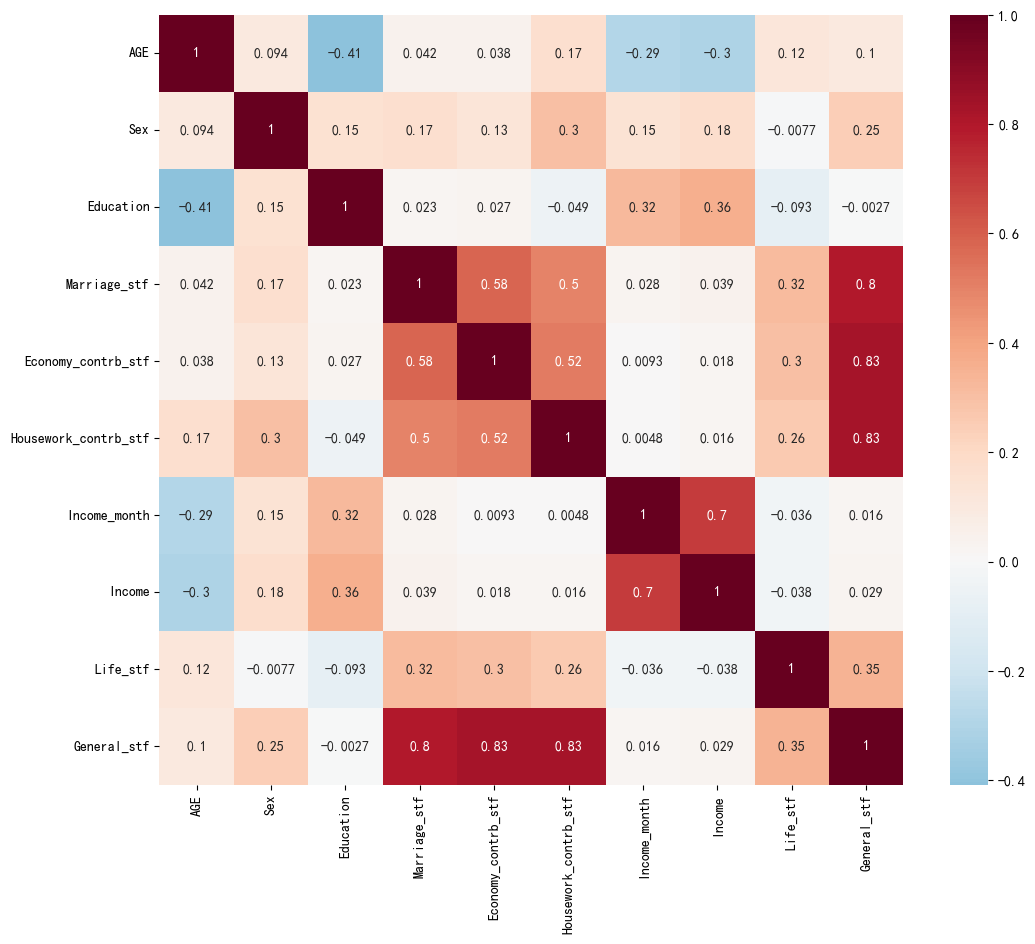

In [521]:
# 热力图可视化
plt.figure(figsize=(12, 10))
sns.heatmap(data_nice.corr(), annot=True, cmap='RdBu_r', center=0)
plt.show()


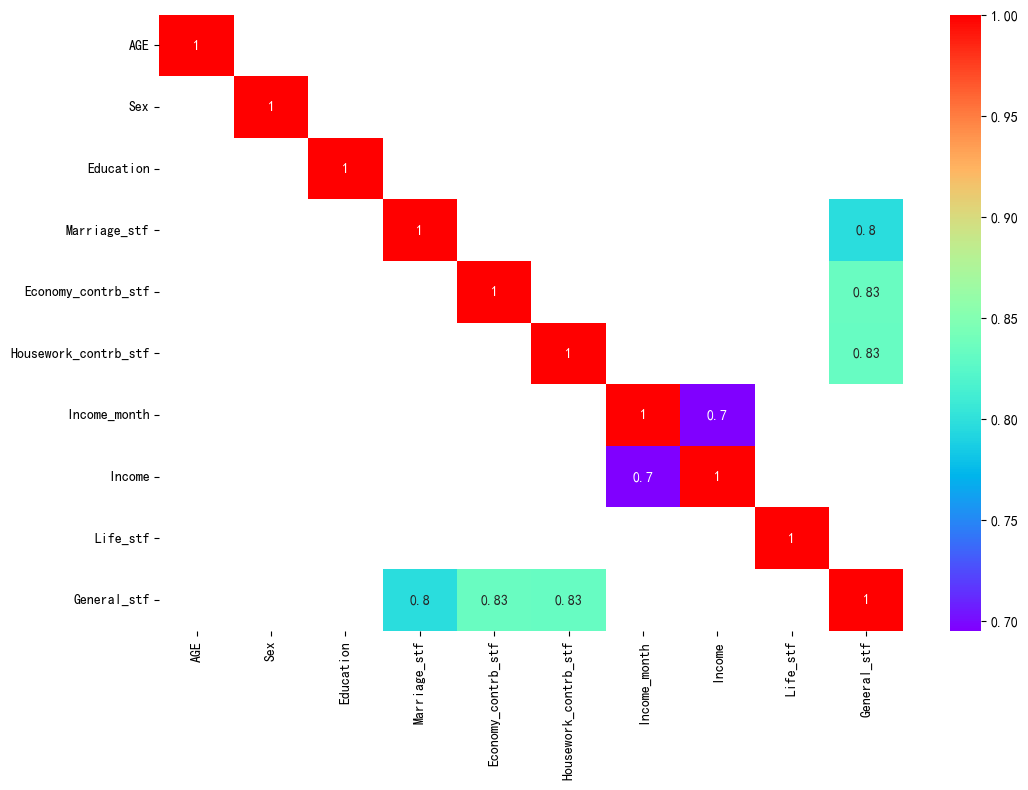

相关系数高于0.69小于1(极高相关程度)变量对：
('General_stf', 'Housework_contrb_stf')
('Income', 'Income_month')
('General_stf', 'Marriage_stf')
('Economy_contrb_stf', 'General_stf')


In [522]:

# 计算相关系数矩阵
corr_matrix = data_nice.corr()

# 设置阈值
threshold = 0.69
ceiling=1
# 将相关系数矩阵中小于阈值的元素替换为 NaN
corr_matrix[corr_matrix.abs() < threshold] = pd.np.nan
corr_matrix[corr_matrix.abs()>ceiling]=pd.np.nan
# 绘制热力图
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='rainbow')
plt.show()

# 提取相关系数绝对值大于等于阈值的变量配对
high_corr_pairs = set()
for col in corr_matrix.columns:
    for idx in corr_matrix.index:
        if abs(corr_matrix.loc[idx, col]) >= threshold and idx < col:
            high_corr_pairs.add((idx, col))

#极高相关程度的变量配对
print('相关系数高于0.69小于1(极高相关程度)变量对：')
for pair in high_corr_pairs:
    print(pair)
    


考虑只保留General_stf和Income

In [523]:
data_nice.drop(['Marriage_stf','Income_month','Economy_contrb_stf','Housework_contrb_stf'],axis=1,inplace=True)

## 2|4 数据可视化

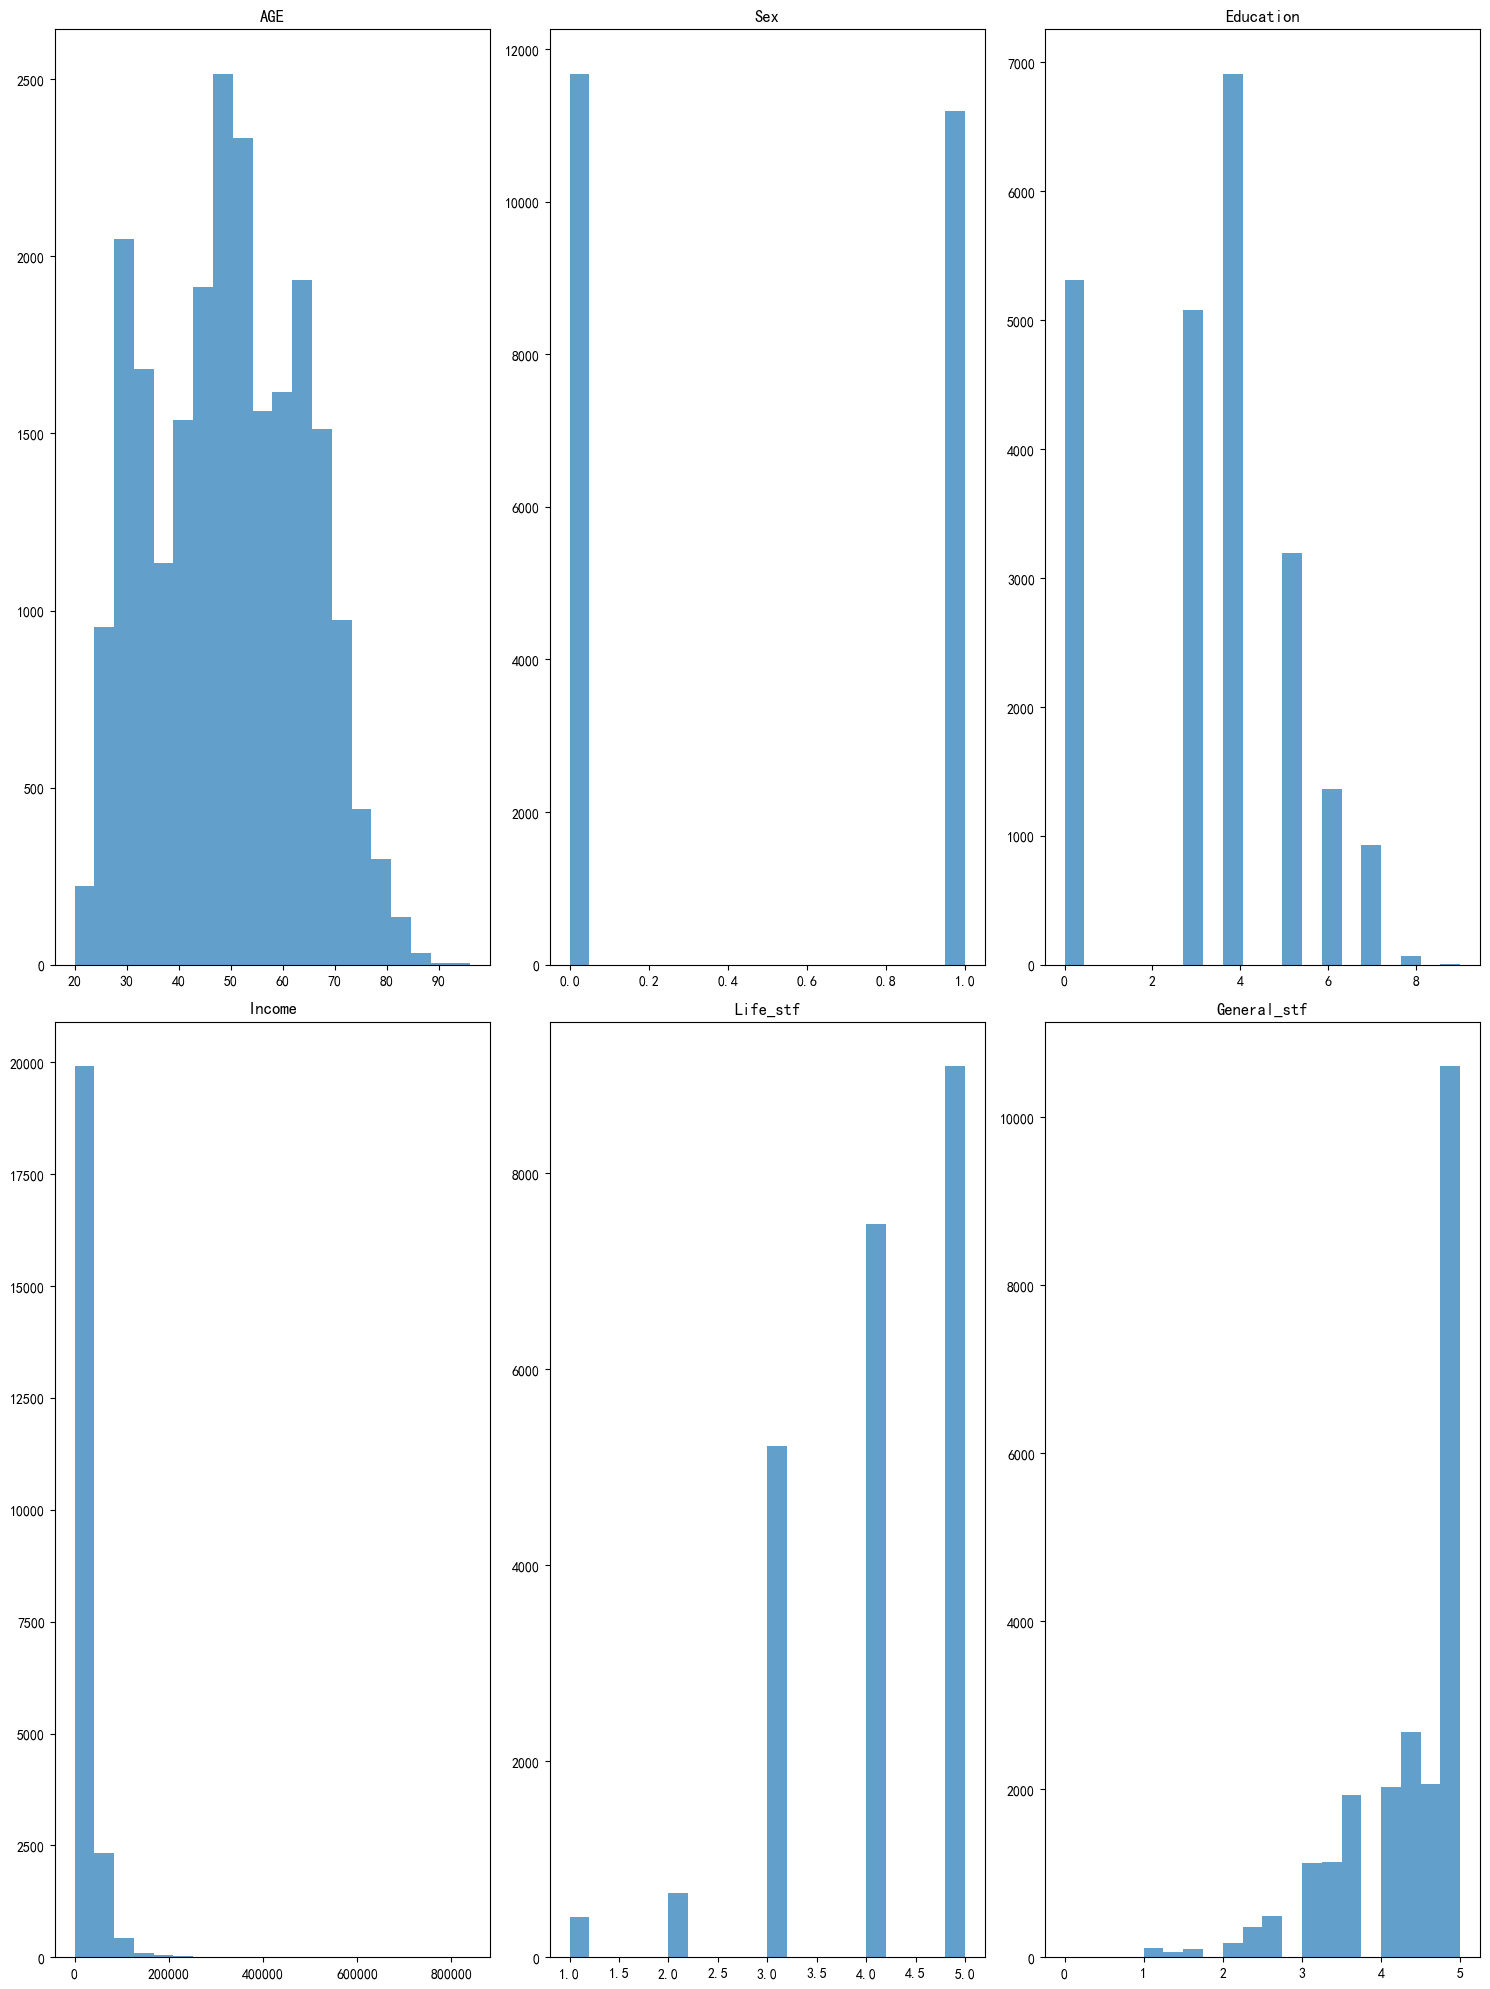

In [524]:
# 创建子图
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 20))

# 遍历数据所有字段，绘制直方图
for i, col_name in enumerate(data_nice.columns):
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    ax.hist(data_nice[col_name], bins=20, histtype='bar', alpha=0.7)
    ax.set_title(col_name)

# 配置子图布局和样式
fig.tight_layout()

# 显示图形
plt.show()

# 3| 研究问题


## 3|1 描述型问题
- 3|1|1 受访者的年龄分布
- 3|1|2 受访者的性别分布
- 3|1|3 受访者的个人年度总收入分布
- 3|1|4 受访者的受教育程度分布
- 3|1|5 受访者的婚姻整体满意度分布
- 3|1|6 受访者生活满意度分布




### 3|1|1 受访者的年龄分布

In [525]:
#查看受访者的年龄
data_nice["AGE"].value_counts()

50    730
55    691
48    644
53    632
56    607
     ... 
87      4
93      3
91      1
96      1
92      1
Name: AGE, Length: 74, dtype: int64

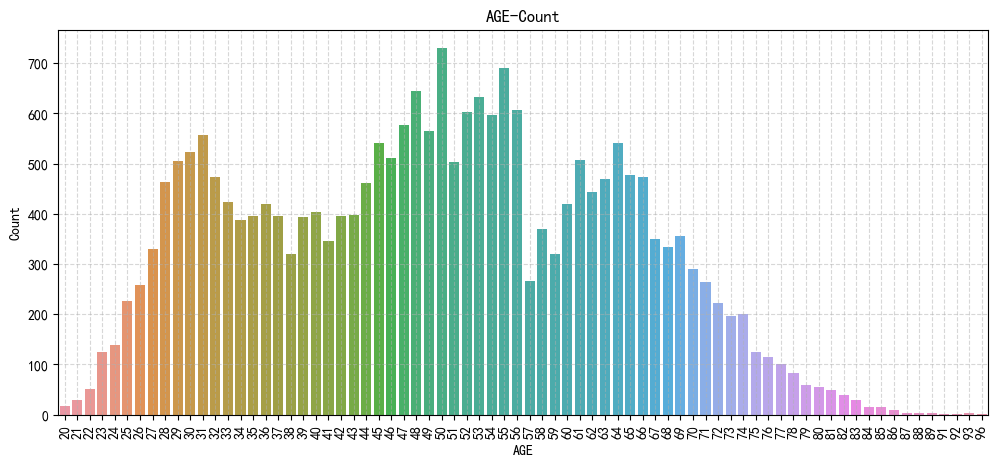

In [526]:
#可视化受访者的年龄
plt.figure(figsize=(12,5))
sns.countplot(x='AGE',data=data_nice)
#x轴标签
plt.xlabel('AGE')
#y轴标签
plt.ylabel('Count')
#标题
plt.title('AGE-Count')
#调整x轴刻度
plt.xticks(rotation=90)
#网格线
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()


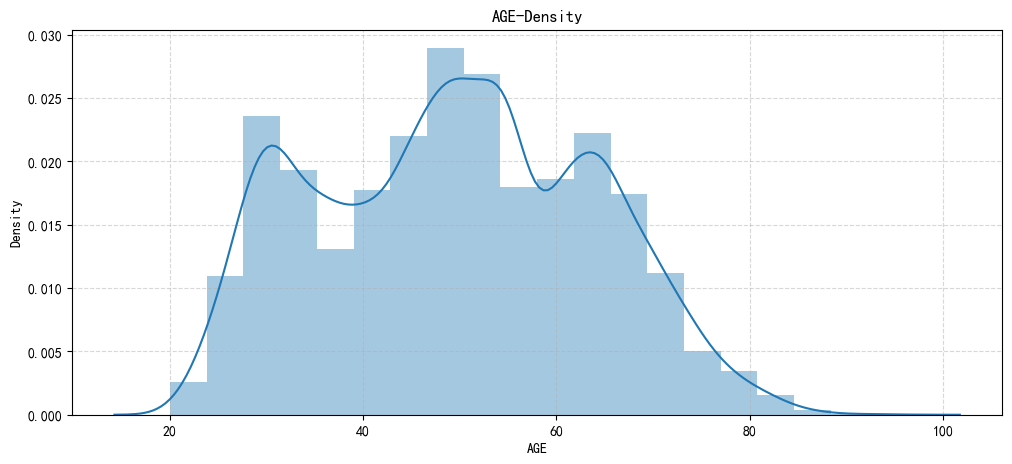

In [527]:
#绘制直方图
plt.figure(figsize=(12,5))
sns.distplot(data_nice['AGE'],bins=20)
#x轴标签
plt.xlabel('AGE')
#y轴标签
plt.ylabel('Density')
#标题
plt.title('AGE-Density')
#网格线
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()

解读：
- 可以看出受访者年龄分布呈现出三峰分布的格局

- 45-55岁之间的受访者数量最多，这可能是因为这个年龄段的人通常处于家庭重心转型期，需要面对诸如养育子女、工作压力、个人情感等多种因素影响的压力和挑战，所以对他们的生活和未来更为关注。同时，这个年龄段的人通常处于生活经验丰富，对社会、政治等话题也有较深刻的认识，容易成为调查研究的受访群体。

- 其次是28-33岁之间的受访者数量。这可能与这个年龄段的人正在各自的事业发展期，面临着学习、工作和家庭等多重压力，也受到了广泛的关注。此外，这个年龄段的人通常拥有较高的教育水平和职业能力，对社会和时事也具有很高的关注度。

- 再次是60-65岁之间的受访者数量，这也是一个值得注意的年龄段。这个年龄段的人通常已经退休或即将退休，对于养老、医疗等话题具有很高的关注度。此外，这个年龄段的人通常拥有较为丰富的人生经验和社会阅历，对于各种公共政策和事件也有很深刻的认识。

- 在这个调查设计中，年龄因素具有代表性，可以反映受访者的特征和群体心理状况。

### 3|1|2 受访者性别分布

In [528]:
# 受访者性别分布(1表示男，0表示女)
data_nice["Sex"].value_counts()

0    11673
1    11186
Name: Sex, dtype: int64

解读：
- 男女受访者的数量相近，呈现基本均衡的分布。这说明在这次调查中男女受访者的参与度相当，双方的意见和反馈对分析结果有较大的代表性。

- 这一均衡分布可能和调查方式和抽样策略有关：从数据描述来看，该调查是通过抽样家庭作为单元的方式进行的，而不是单独抽取个人作为受访对象。家庭成员包括男女性别的比例通常是比较均衡的，所以从这个角度看这种分布情况是合理的，也符合一定的统计规律。

### 3|1|3 受访者的个人年度总收入分布

In [529]:
data_nice["Income"].value_counts().sort_index()

0         14147
1             3
12            1
48            1
56            1
          ...  
500000        4
533000        1
653000        1
675000        1
840000        1
Name: Income, Length: 813, dtype: int64

In [530]:
data_nice["Income"].describe()

count     22859.000000
mean      14994.041340
std       30474.102289
min           0.000000
25%           0.000000
50%           0.000000
75%       24000.000000
max      840000.000000
Name: Income, dtype: float64

    计算基尼系数

In [531]:
def gini_coefficient(x):
    """Compute Gini coefficient of array of values"""
    diffsum = 0
    for i, xi in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(xi - x[i:]))
    return diffsum / (len(x)**2 * np.mean(x))
#输出基尼系数，保留三位小数
print(f"基尼系数为：{round(gini_coefficient(data_nice['Income']),3)}")

基尼系数为：0.778


基尼系数约为0.778，说明受访者收入不均匀，存在贫富差距，贫富分化严重

参考网站：[基尼系数计算](https://stackoverflow.com/questions/39512260/calculating-gini-coefficient-in-python-numpy)

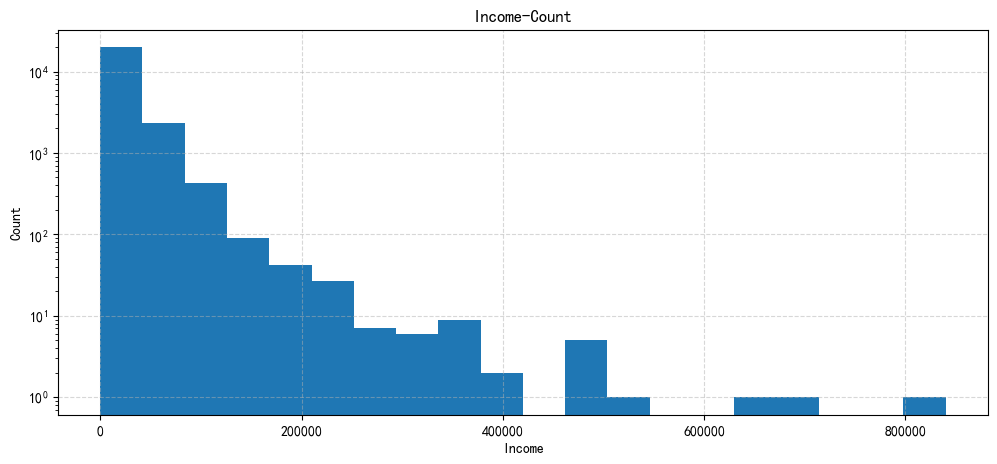

In [532]:
#可视化展示受访者的个人年度总收入
plt.figure(figsize=(12,5))
plt.hist(data_nice['Income'],bins=20)
#y轴标签取10为底的对数
plt.yscale('log')
#x轴标签    
plt.xlabel('Income')
#y轴标签
plt.ylabel('Count')
#标题
plt.title('Income-Count')
#网格线
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()

    偏度和峰度

In [533]:
#计算偏度和峰度,保留两位小数
print(f"偏度为：{round(data_nice['Income'].skew(),2)}")
print(f"峰度为：{round(data_nice['Income'].kurt(),2)}")
#偏度为：5.81,峰度为：77.23,可以看出收入数据呈现右偏分布，且数据极度集中在低收入区间

偏度为：5.81
峰度为：77.23


解读：
- 偏度为5.81，判断该个人年总收入收入呈现右偏分布。峰度为77.23，远大于3，说明个人年总收入收入呈现非常明显的高峰窄尾特征。
- 可以看出该收入数据呈现右偏分布，且数据极度集中在低收入区间。

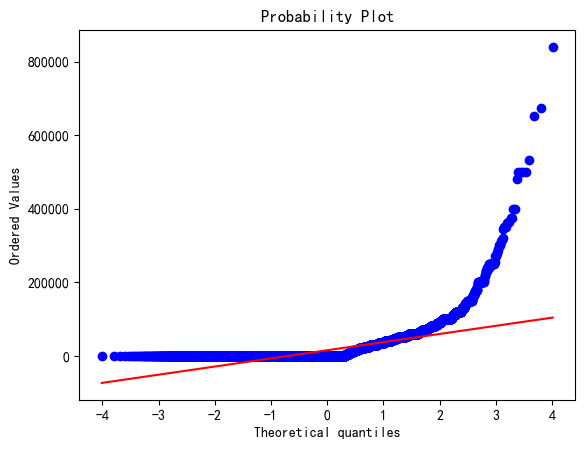

In [534]:
#绘制pp图
stats.probplot(data_nice['Income'], dist="norm", plot=plt)
plt.show()


解读：
- PP图的参考线和对角线的差异较大，反映出数据不呈现正态分布，而呈现右偏分布

### 3|1|4 受访者教育程度分布

In [535]:
#受访者教育程度分布
data_nice["Education"].value_counts()

4.0    6911
0.0    5314
3.0    5079
5.0    3191
6.0    1362
7.0     927
8.0      70
9.0       5
Name: Education, dtype: int64

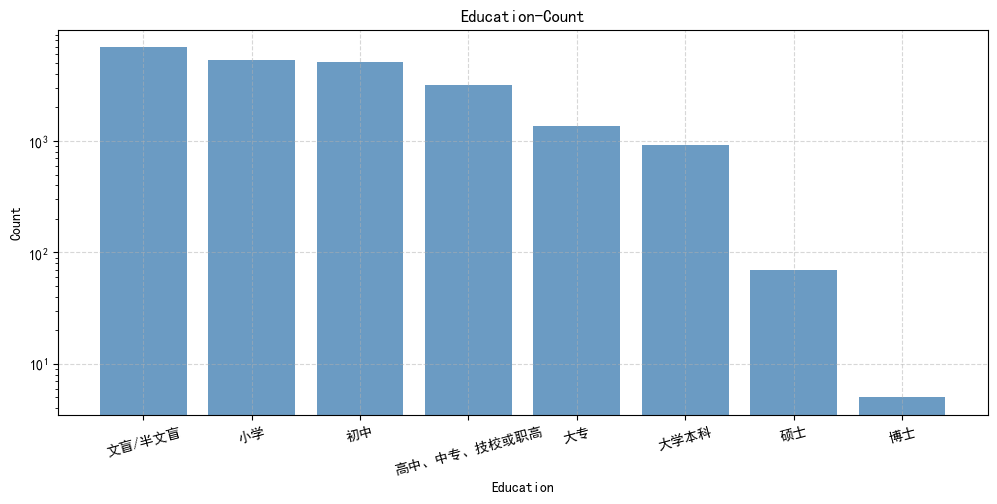

In [536]:
xlabel=['文盲/半文盲','小学','初中','高中、中专、技校或职高','大专','大学本科','硕士','博士']
#教育程度分布：可视化（绘图时以编码前的信息作为标签）
plt.figure(figsize=(12,5))
plt.bar(xlabel,data_nice["Education"].value_counts(),color='steelblue',alpha=0.8)
#x轴标签
plt.xlabel('Education')
#y轴标签
plt.ylabel('Count')
#标题
plt.title('Education-Count')
#调整x轴刻度
plt.xticks(rotation=15)
#y轴取以10为底的对数
plt.yscale('log')
#网格线
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()


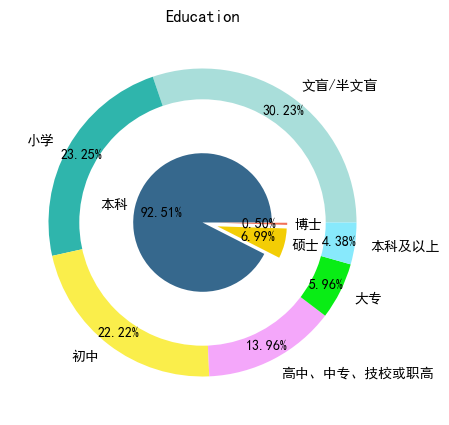

In [537]:

#饼状图
plt.figure(figsize=(12,5))
#绘图时合并显示“本科”、“硕士”和“博士”三个类别
data1=data_nice.copy()              #复制数据
data1["Education"].replace([7,8,9],[7,7,7],inplace=True) #将“本科”、“硕士”和“博士”三个类别合并为“本科及以上”
#绘制饼图
plt.pie(data1["Education"].value_counts(),labels=['文盲/半文盲','小学','初中','高中、中专、技校或职高','大专','本科及以上'],autopct='%1.2f%%',colors=['#A9DEDA','#2FB5AC','#FAEE4B','#F4A7FA','#09ED15','#88E9FC'],pctdistance=0.9)
plt.pie([1],colors=['w'],radius=0.8)
#对于本科及以上的受访者，在原有的大饼图下绘制小饼图
plt.pie(data_nice["Education"][data_nice["Education"]>=7].value_counts(),labels=['本科','硕士','博士'],autopct='%1.2f%%',radius=0.45,colors=['#36688D','#F3CD05','#F27157'],explode=[0,0.1,0.1])
#标题
plt.title('Education')
plt.show()

#### 解读
- 从教育程度分布图中可以看出，受访者文盲/半文盲的人数最多，其次是小学，大学本科及以上的人数最少
- 可以看出，受访者的教育程度整体较低

### 3|1|5 受访者的婚姻整体满意度分布


In [538]:
data_nice["General_stf"].value_counts()

5.00    10604
4.33     2681
4.67     2060
4.00     2023
3.67     1932
3.33     1138
3.00     1124
2.67      496
2.33      357
2.00      167
1.00      107
1.67       98
1.33       65
0.67        3
0.00        2
0.33        2
Name: General_stf, dtype: int64

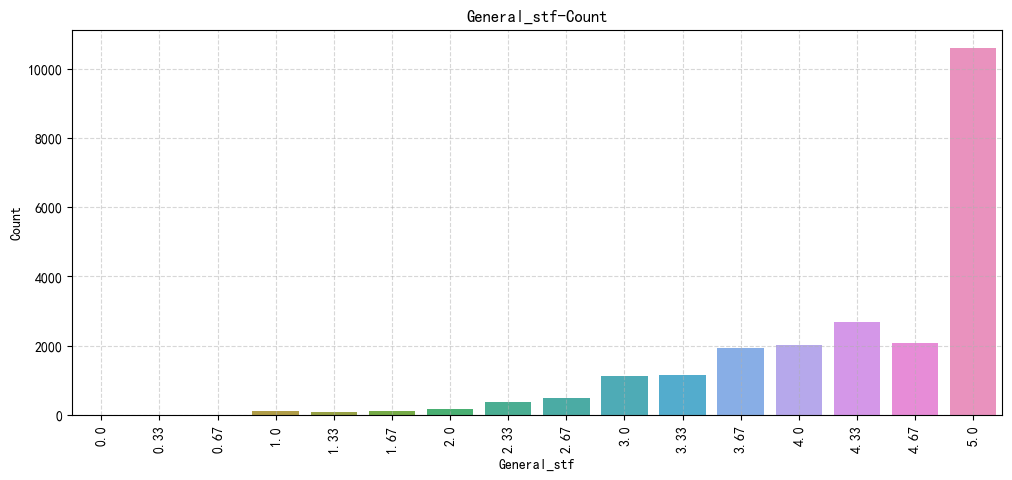

In [539]:
#可视化展示受访者的婚姻整体满意度分布
plt.figure(figsize=(12,5))
sns.countplot(x='General_stf',data=data_nice)
#x轴标签
plt.xlabel('General_stf')
#y轴标签
plt.ylabel('Count')
#标题
plt.title('General_stf-Count')
#调整x轴刻度
plt.xticks(rotation=90)
#网格线
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()



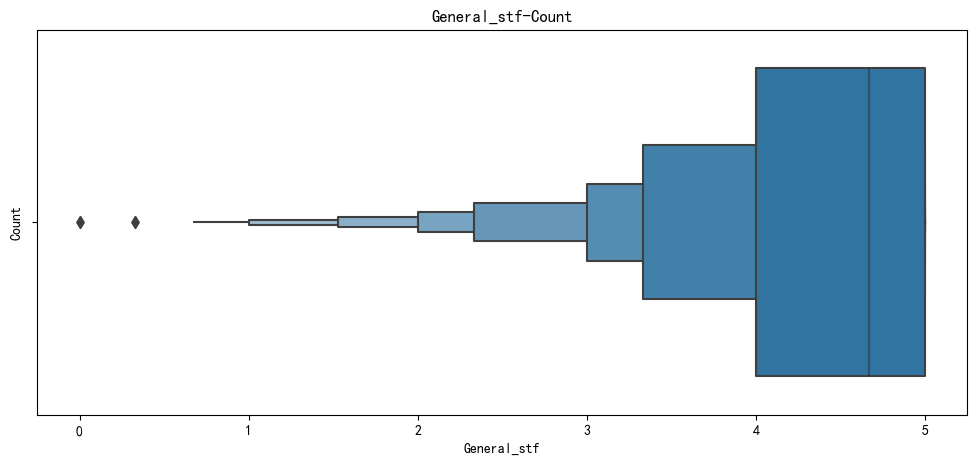

In [540]:
#可视化展示受访者的婚姻整体满意度分布
plt.figure(figsize=(12,5))
sns.boxenplot(x='General_stf',data=data_nice)
#x轴标签
plt.xlabel('General_stf')
#y轴标签
plt.ylabel('Count')
#标题
plt.title('General_stf-Count')
plt.show()


In [541]:
#偏度
print(f"偏度为：{round(data_nice['General_stf'].skew(),2)}")
#峰度
print(f"峰度为：{round(data_nice['General_stf'].kurt(),2)}")

偏度为：-1.36
峰度为：1.6


解读：
- 通过直方图和箱型图可以看出，大多数人给自己的婚姻打了较高的分数，表明他们对婚姻的满意程度较高。而少部分人给出了较低的分数，说明他们对婚姻的满意程度较低。
- 偏度为-1.36说明这组数据呈现明显的左偏态,数据的分布向左侧偏离平均值。这一点和直方图中看到的分布趋势是相符的，说明大多数人对婚姻满意程度较高，但是仍有一部分人对婚姻不够满意。

- 峰度为1.6，说明这组数据的分布相对于正态分布而言略微更陡峭一些（峰度>0），数据的主体集中在均值周围，但比正态分布的尖度要稍微小一些。
- 总体上来说，这组数据的分布呈现出一定的偏态，大多数人的满意度都比较高，但并非所有人都对婚姻感到满意。

### 3|1|6 受访者生活满意度分布

In [542]:
data_nice["Life_stf"].value_counts()

5.0    9093
4.0    7487
3.0    5221
2.0     652
1.0     406
Name: Life_stf, dtype: int64

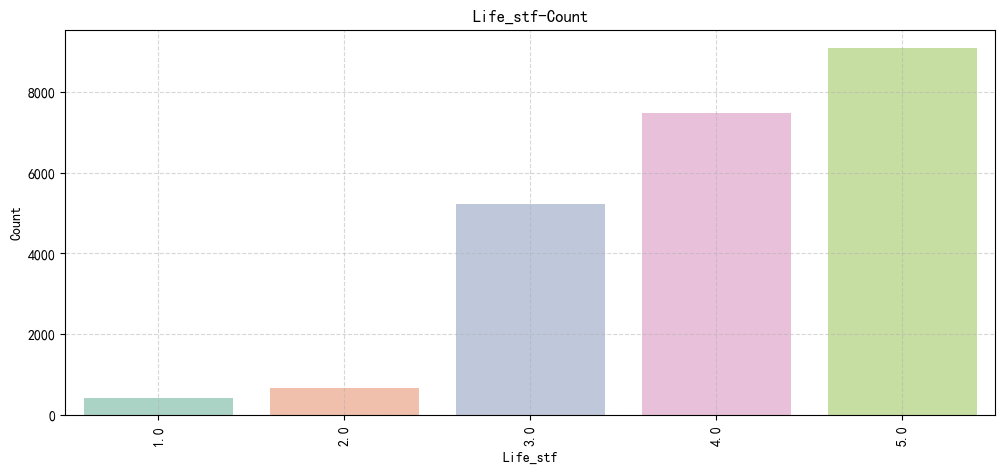

In [543]:
#可视化生活满意程度分布
plt.figure(figsize=(12,5))
sns.countplot(x='Life_stf',data=data_nice,palette='Set2',alpha=0.6)
#x轴标签
plt.xlabel('Life_stf')
#y轴标签
plt.ylabel('Count')
#标题
plt.title('Life_stf-Count')
#调整x轴刻度
plt.xticks(rotation=90)
#网格线
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()


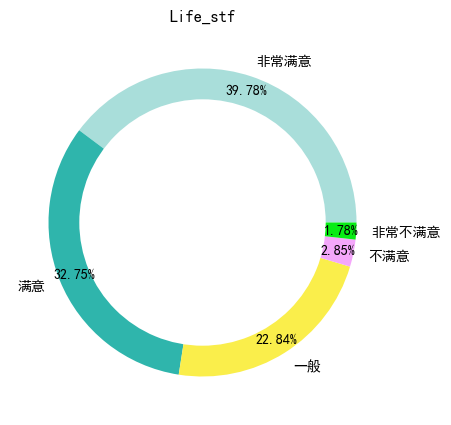

In [544]:
# 绘制饼图
plt.figure(figsize=(12,5))
plt.pie(data_nice["Life_stf"].value_counts(),labels=['非常满意','满意','一般','不满意','非常不满意'],autopct='%1.2f%%',colors=['#A9DEDA','#2FB5AC','#FAEE4B','#F4A7FA','#09ED15'],pctdistance=0.9)
#调整百分比数字离圆心的距离
plt.pie([1],colors=['w'],radius=0.8)
#标题
plt.title('Life_stf')
plt.show()


解读：
- 生活满意度总体较高：大多数人给出了4.0或5.0的高分，其中5.0分的受访者最多。
- 相对而言，较少人表达了对生活不满意的情绪：1.0或2.0分的受访者数量相对较少，总计约占全部样本的5%左右。
- 生活满意度的分布呈现正偏态，大部分受访者对生活的满意程度都比较高，但也有一部分人对生活的满意度不够。
- 综上所述，这组数据显示出整体上的正向情绪，受访者对生活满意度较高。

## 3|2 解释型问题
- 3|2|1 个人年度总收入和生活满意度的关系
- 3|2|2 性别对婚姻满意度的影响是怎样的？
- 3|2|3 教育程度与收入水平的关系如何，是否存在显著的相关性？
- 3|2|4 年龄与婚姻满意度之间是否存在关系？如果存在，是否随着年龄增长而变化？
- 3|2|5 婚姻整体满意度对个人生活满意度的影响程度是多少？


整体探索相关性


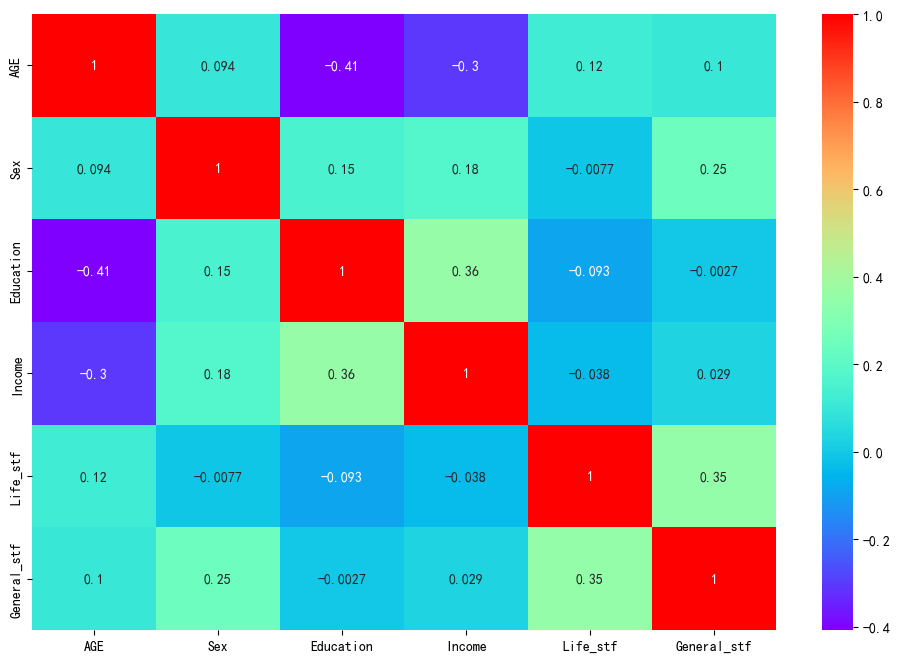

In [545]:
cordata=data_nice.corr()
cordata
#可视化相关系数
plt.figure(figsize=(12, 8))
sns.heatmap(cordata, annot=True, cmap='rainbow')
plt.show()


#### 相关系数的划分阈值：
[参考资料](https://baike.baidu.com/item/Pearson%E7%9B%B8%E5%85%B3%E7%B3%BB%E6%95%B0/6243913)
- 0.8 ~ 1.0：非常强的相关性
- 0.6 ~ 0.8：强相关性
- 0.4 ~ 0.6：中等程度的相关性
- 0.2 ~ 0.4：弱相关性
- 0.0 ~ 0.2：几乎没有相关性



相关系数高于0.2变量的热力图


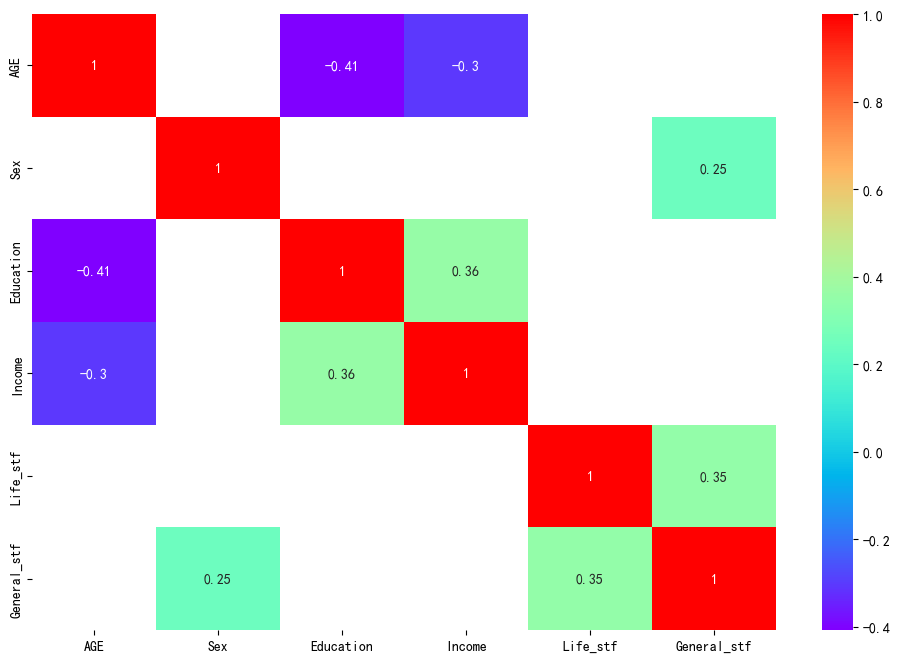

相关系数高于0.2的变量对：
('AGE', 'Income')
('General_stf', 'Sex')
('AGE', 'Education')
('General_stf', 'Life_stf')
('Education', 'Income')


In [546]:

# 计算相关系数矩阵
corr_matrix = data_nice.corr()

# 设置阈值
threshold = 0.2
ceiling=1
# 将相关系数矩阵中小于阈值的元素替换为 NaN
corr_matrix[corr_matrix.abs() < threshold] = pd.np.nan
corr_matrix[corr_matrix.abs()>ceiling]=pd.np.nan
# 绘制热力图
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='rainbow')
plt.show()

# 提取相关系数绝对值大于等于阈值的变量配对
high_corr_pairs = set()
for col in corr_matrix.columns:
    for idx in corr_matrix.index:
        if abs(corr_matrix.loc[idx, col]) >= threshold and idx < col:
            high_corr_pairs.add((idx, col))
#中等相关程度的变量配对
print('相关系数高于0.2的变量对：')
for pair in high_corr_pairs:
    print(pair)


可以看出，弱相关关系的有：
- ('AGE', 'Income')
- ('General_stf', 'Sex')
- ('General_stf', 'Life_stf')
- ('Education', 'Income')

中等相关关系的有：
- ('AGE', 'Education')

### 3|2|1 个人年度总收入和生活满意度的关系


    可视化分析

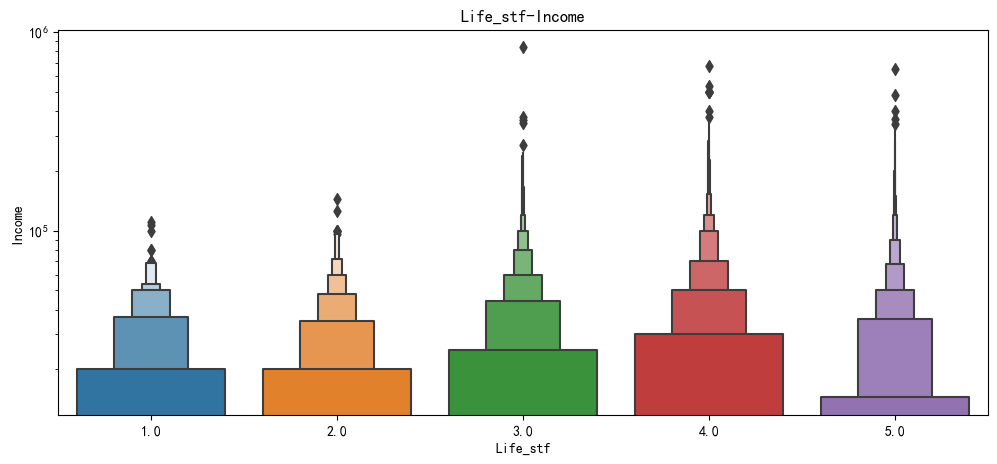

In [547]:
#个人年度总收入和生活满意度的关系
plt.figure(figsize=(12,5))
sns.boxenplot(x='Life_stf',y='Income',data=data_nice)
#x轴标签
plt.xlabel('Life_stf')
#y轴标签
plt.ylabel('Income')
#取对数
plt.yscale('log')
#标题
plt.title('Life_stf-Income')
plt.show()


    相关系数分析

In [548]:
#检验个人年度总收入和生活满意度的相关度关系
#计算相关系数
print(f"相关系数为：{round(data_nice['Income'].corr(data_nice['Life_stf']),2)}")
#计算p值
print(f"p值为：{round(stats.pearsonr(data_nice['Income'],data_nice['Life_stf'])[1],2)}")



相关系数为：-0.04
p值为：0.0


解读：
- 相关系数为负数：相关系数为-0.04表明个人年度总收入和生活满意度呈现出一定的负相关性，即当个人年度总收入增加时，其生活满意度有可能会下降，反之亦然。不过需要注意的是，相关系数的绝对值较小（小于0.3），因此两者之间的关联并不是非常强烈。

- p值极小：p值为0.0表明这个相关系数是非常显著的（p值通常要小于0.05才能认为是显著的），也就是说这个相关系数发生的概率非常低，具有统计学意义。

- 综上所述，可以得出这样的结论：尽管个人年度总收入和生活满意度呈现出负相关的趋势，但是两者之间的联系并不是非常强烈，相关系数的值较小，无法说明两者之间的因果关系，所以不能轻易得出让个人年度总收入增加便能提高生活满意度的结论。

### 3|2|2 性别对婚姻满意度的影响是怎样的？


    可视化分析

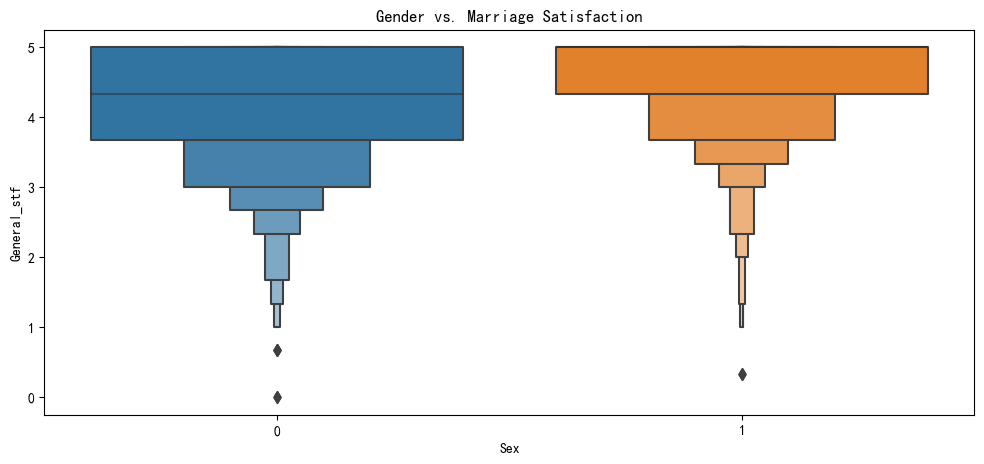

In [549]:
#性别对婚姻满意度的影响

# 设置图形大小
plt.figure(figsize=(12, 5))

# 绘制Boxen图，并指定x轴、y轴和数据源
sns.boxenplot(x='Sex', y='General_stf', data=data_nice)

# 设置x轴标签
plt.xlabel('Sex')

# 设置y轴标签
plt.ylabel('General_stf')

# 设置图形标题
plt.title('Gender vs. Marriage Satisfaction')

# 显示图形
plt.show()

    回归分析


In [550]:
import statsmodels.formula.api as smf

# 建立线性回归模型，探究性别对婚姻满意度的影响
lm = smf.ols(formula='General_stf ~ Sex', data=data_nice).fit()
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:            General_stf   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     1475.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          1.05e-312
Time:                        05:08:35   Log-Likelihood:                -27246.
No. Observations:               22859   AIC:                         5.450e+04
Df Residuals:                   22857   BIC:                         5.451e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1521      0.007    562.912      0.0


解读：
- 模型的拟合优度：根据R-squared值（0.061），可以得知该回归模型解释了6.1%的总体方差，即该模型的拟合优度较低。

- 性别对婚姻满意度的影响：根据回归系数（coef）可以得知，性别（Sex）对婚姻满意度（General_stf）有显著的影响，系数值为0.4049。则女性的婚姻满意度比男性高约0.4分，这个差距是显著的（P<0.001）。

- 其他统计信息：模型的F-statistic值为1475，模型整体上是显著的

- 根据回归分析的输出结果，可以初步得出结论：性别对婚姻满意度有显著的影响，女性的婚姻满意度比男性高，但是该回归模型的拟合效果不太理想，还需要进一步考虑其他因素对婚姻满意度的影响。


    分组统计分析

In [551]:
# 按照性别分组，计算每个性别的婚姻满意度的均值、中位数等
grouped_df = data_nice.groupby('Sex')['General_stf'].agg(['mean', 'median', 'min', 'max'])
print(grouped_df)


         mean  median   min  max
Sex                             
0    4.152125    4.33  0.00  5.0
1    4.557041    5.00  0.33  5.0


解读：
- 根据均值统计，女性的婚姻满意度（4.557）比男性（4.152）略高一些。

- 根据中位数统计，女性和男性的婚姻满意度有明显的差异，女性的婚姻满意度的中位数（5.0）比男性的中位数（4.33）高出很多。

- 根据最小值和最大值统计，女性和男性的婚姻满意度都分布在0-5的范围内。女性的最小值为0.33，比男性的最小值要高；男性的最大值为5.0，与女性相同。

- 综上所述，基于当前数据，可以初步得出结论：在这个样本中，女性的婚姻满意度整体更高

### 3|2|3 教育程度与收入水平的关系如何，是否存在显著的相关性？


    可视化分析

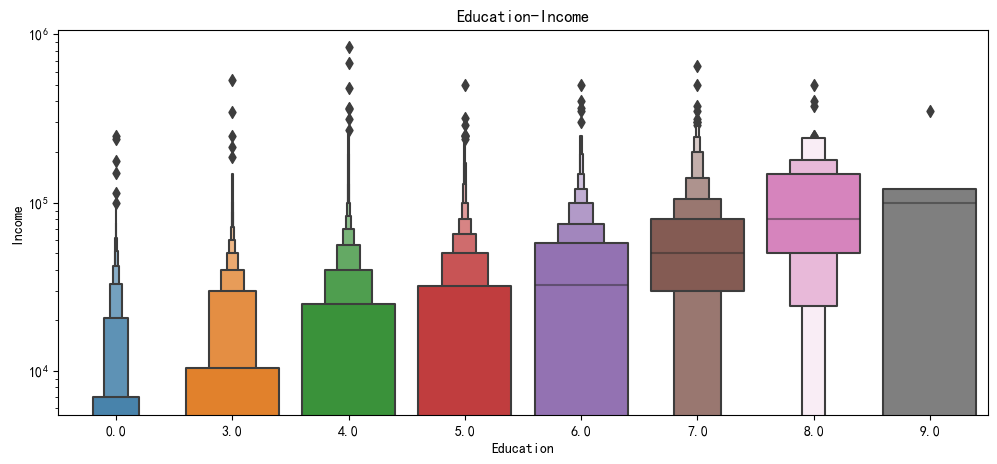

In [552]:
#不同教育程度的收入水平分布
plt.figure(figsize=(12,5))
sns.boxenplot(x='Education',y='Income',data=data_nice)
#x轴标签
plt.xlabel('Education')
#y轴标签
plt.ylabel('Income')
#取对数
plt.yscale('log')
#标题
plt.title('Education-Income')
plt.show()

    

解读：
- 整体上看，箱型图的分布随着学历的增长而逐渐上移，说明学历和收入之间存在一定的正相关关系

    回归分析

In [553]:
#教育程度与收入水平的关系
import statsmodels.api as sm
# 提取自变量和因变量
x = data["Education"]
y = data["Income"]

# 添加截距项
x = sm.add_constant(x)

# 拟合线性回归模型
model = sm.OLS(y, x).fit()

# 查看回归结果
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     3372.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        05:08:35   Log-Likelihood:            -2.6687e+05
No. Observations:               22859   AIC:                         5.337e+05
Df Residuals:                   22857   BIC:                         5.338e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2363.7269    353.205     -6.692      0.0

解读：
- 教育程度与收入水平存在一定的正相关关系，教育程度越高，收入水平也越高。

- 模型的可决系数（R-squared）为0.129，也就是教育程度只能解释收入水平13%的方差，还有87%的方差需要通过其他因素来解释。

- 回归系数的显著性检验结果显示，教育程度对收入水平的影响是显著的（P值小于0.05）。

- F统计量的P值接近0，说明模型对数据的拟合程度较高。

- 备注：这里采用的是单变量线性回归模型，未考虑其他可能影响收入水平的因素。






    相关系数分析

In [554]:
#计算相关系数
print(f"相关系数为：{round(data_nice['Education'].corr(data_nice['Income']),2)}")
#计算p值
print(f"p值为：{round(stats.pearsonr(data_nice['Education'],data_nice['Income'])[1],2)}")


相关系数为：0.36
p值为：0.0


解读：
- 相关系数为0.36表示教育程度和收入水平之间存在一定程度的正相关关系。

- p值为0.0，显著小于显著性水平0.05，因此我们可以拒绝原假设（教育程度与收入水平无相关性），得到教育程度与收入水平有相关性。

### 3|2|4 年龄与婚姻满意度之间是否存在关系？如果存在，是否随着年龄增长而变化？


    回归分析

In [555]:
#年龄与婚姻满意度之间是否存在关系
# 提取自变量和因变量
x = data_nice["AGE"]
y = data_nice["General_stf"]

# 添加截距项
x = sm.add_constant(x)

# 拟合线性回归模型
model = sm.OLS(y, x).fit()

# 查看回归结果
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:            General_stf   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     239.7
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           8.63e-54
Time:                        05:08:35   Log-Likelihood:                -27841.
No. Observations:               22859   AIC:                         5.569e+04
Df Residuals:                   22857   BIC:                         5.570e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0597      0.020    207.856      0.0

解读：
- 模型的R-squared值为0.010，说明自变量（AGE）能够解释因变量（General_stf）的方差的10%。
- 回归系数coef的值分别为4.0597和0.0059，常数项为4.0597，当年龄为0时，婚姻满意度为4.0597；年龄的系数为0.0059，说明每增加1岁，婚姻满意度会增加0.0059。
- F-statistic为239.7，P值为8.63e-54，表示模型的整体显著性检验通过，自变量（AGE）对因变量（General_stf）产生的影响是显著的。
- 统计检验中，常数项和年龄的t值分别为207.856和15.482，P值均小于0.05，说明常数项和年龄的系数都是显著的。
- 所以可以认为年龄与婚姻满意度之间存在正向线性关系，随着年龄的增长，人们对婚姻的满意度也会相应提高。
- 同时也要注意模型拟合效果不佳，需要进一步考虑其他因素的影响。

    可视化分析

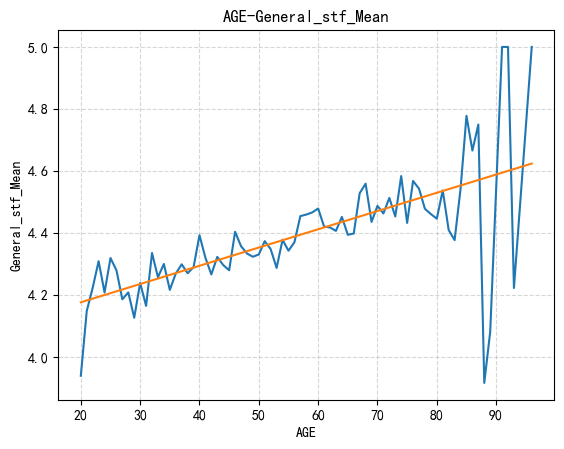

In [556]:
#折线图
#聚合满意度，为平均值
data_nice.groupby('AGE')['General_stf'].mean().plot()
#x轴标签
plt.xlabel('AGE')
#y轴标签
plt.ylabel('General_stf_Mean')
#标题
plt.title('AGE-General_stf_Mean')
#网格线
plt.grid(True,linestyle='--',alpha=0.5)
#拟合曲线
plt.plot(np.unique(data_nice['AGE']), np.poly1d(np.polyfit(data_nice['AGE'], data_nice['General_stf'], 1))(np.unique(data_nice['AGE'])))
plt.show()

    相关系数分析

In [557]:
# 相关系数
print(f"相关系数为：{round(data_nice['AGE'].corr(data_nice['General_stf']),2)}")
# p值
print(f"p值为：{round(stats.pearsonr(data_nice['AGE'],data_nice['General_stf'])[1],2)}")


相关系数为：0.1
p值为：0.0


解读：
- 整体可以看出，年龄（AGE）与婚姻满意度（General_stf）的相关系数为0.1，两者之间有一定的正向线性关系，但程度较弱。
- P值为0.0，表示年龄与婚姻满意度的相关性具有显著性，P值为0.0，表示年龄与婚姻满意度的相关性具有显著性

### 3|2|5 婚姻整体满意度对个人生活满意度的影响程度是多少？

    回归分析

In [558]:
#婚姻整体满意度对个人生活满意度的影响程度
# 提取自变量和因变量
x = data_nice["General_stf"]
y = data_nice["Life_stf"]

# 添加截距项
x = sm.add_constant(x)

# 拟合线性回归模型
model = sm.OLS(y, x).fit()

# 查看回归结果
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Life_stf   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     3187.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        05:08:36   Log-Likelihood:                -29696.
No. Observations:               22859   AIC:                         5.940e+04
Df Residuals:                   22857   BIC:                         5.941e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.3063      0.032     72.998      

解读：
- 模型的拟合优度：R-squared的值为0.122，解释性较弱
- 整体婚姻满意度对个人生活满意度的影响：回归系数 General_stf 的值为0.4029，表明整体婚姻满意度与个人生活满意度存在正向相关关系，即婚姻满意度越高，个人的生活满意度也会相应提高。结论具有高度显著性（P值小于0.05）
- 常数项的影响：在回归方程中，截距 const 的值为2.3063，表示当婚姻满意度为0时，个人的生活满意度为2.3063。即使没有婚姻满意度的支持，个人的生活满意度仍然有一定基础。
- 婚姻整体满意度对个人生活满意度具有显著正向影响

    相关系数分析

In [559]:
# 相关性分析
print(f"相关系数为：{round(data_nice['General_stf'].corr(data_nice['Life_stf']),2)}")
# p值
print(f"p值为：{round(stats.pearsonr(data_nice['General_stf'],data_nice['Life_stf'])[1],2)}")


相关系数为：0.35
p值为：0.0


解读：
- 相关系数：整体婚姻满意度和个人生活满意度之间的皮尔逊相关系数为0.35，存在一定程度的正向关联。整体婚姻满意度越高，个人生活满意度也会相应提高，但是相关程度并不是非常强，还是要考虑其他因素。

- P值：P值为0.0，相关系数非常显著，置信度高（小于0.05）。